In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from collections import OrderedDict
#import networkx as nx
#import cartopy.crs as ccrs

import geopandas as gpd
#from descartes import PolygonPatch



In [40]:
print('reading data from xlsx files global mobility')
data_gl = pd.read_excel('Global_Transnational_Mobility_dataset_v1_0.xlsx')
print('accessing the data')

data_gl.target_name.iloc[1]
print('analyzing the data from Global mobility')
print('plotting number of incoming flights per country as function of time (year)')
ind_data_in =data_gl.loc[data_gl['target_name'] == 'India']
type(ind_data_in)

ind_data_in.source_name.iloc[12]
print('calculating properties of new dataframe')

len(ind_data_in.shape)

reading data from xlsx files global mobility
accessing the data
analyzing the data from Global mobility
plotting number of incoming flights per country as function of time (year)
calculating properties of new dataframe


2

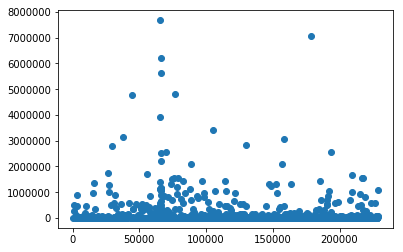

In [23]:
plt.plot(ind_data_in.estimated_trips, 'o')

In [25]:
ind_data_in.estimated_trips

539           229.0
822        256595.0
1101       482618.0
2359         3728.0
2797        98604.0
2837          439.0
2911            7.0
3295          988.0
3413         1326.0
3546          219.0
3573       482228.0
3610         8424.0
3636       890920.0
3637         7466.0
3814          232.0
3817        21027.0
3942         8173.0
4121         1151.0
4674        20446.0
5790         2987.0
5851        21600.0
5911        15873.0
6007          762.0
6191           62.0
6636         1495.0
6770         1210.0
7149         7121.0
7387        12112.0
7488         3467.0
7737           74.0
            ...    
221853      15694.0
222094        654.0
222104       5246.0
222282       5046.0
222528      16431.0
222850      96055.0
222868      30962.0
223207      12010.0
223270     565516.0
223622       1207.0
223897      45407.0
224065       8757.0
224538       1029.0
224676       3615.0
225216       3282.0
226147       4858.0
226258       1001.0
226507       1359.0
226872     569065.0


In [ ]:

ind_data_sort = ind_data_in.sort_values('year')



In [ ]:
plt.plot(ind_data_sort.estimated_trips.values, 'o')

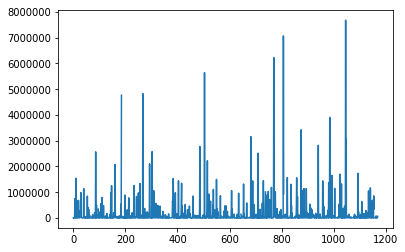

In [33]:
plt.plot(ind_data_sort.estimated_trips.values)

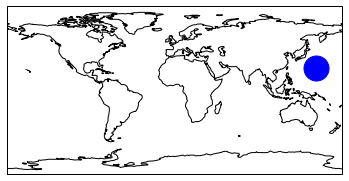

In [26]:
'''
Let us plot the color of each country according to total number of flights in year 2013

For this we first plot basemap
'''
import geopandas as gpd
import numpy as np
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeat

from collections import OrderedDict
import networkx as nx
from descartes import PolygonPatch

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()

ll_to_pixel = ccrs.Geodetic()._as_mpl_transform(ax)

# We need to call draw to ensure that the axes location has been defined
# fully. 
plt.draw()


# Now lets figure out the pixel coordinate of the city.
x1_pix, y1_pix = ll_to_pixel.transform_point([151.2111, -33.8600])
x2_pix, y2_pix = ll_to_pixel.transform_point([101.2111, -33.8600])

# We can even plot these pixel coordinates directly with matplotlib.
plt.plot(x1_pix, y1_pix, 'ob', markersize=25, transform=None)
plt.plot(x2_pix, y2_pix, 'ob', markersize=25, transform=None)

#plt.savefig('figure_1.png', dpi=plt.gcf().get_dpi())
plt.show()

printing properties with world geopandas 
     pop_est      continent                      name iso_a3  gdp_md_est  \
0     920938        Oceania                      Fiji    FJI      8374.0   
1   53950935         Africa                  Tanzania    TZA    150600.0   
2     603253         Africa                 W. Sahara    ESH       906.5   
3   35623680  North America                    Canada    CAN   1674000.0   
4  326625791  North America  United States of America    USA  18560000.0   

                                            geometry  
0  (POLYGON ((180 -16.06713266364245, 180 -16.555...  
1  POLYGON ((33.90371119710453 -0.950000000000000...  
2  POLYGON ((-8.665589565454809 27.65642588959236...  
3  (POLYGON ((-122.84 49.00000000000011, -122.974...  
4  (POLYGON ((-122.84 49.00000000000011, -120 49....  
ploting cities 


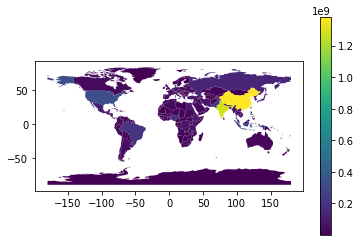

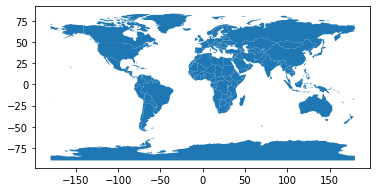

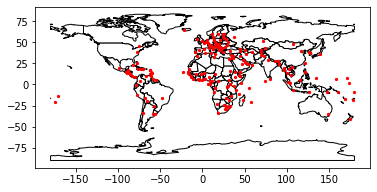

reading data from xlsx files global mobility
accessing the data
   source_name               target_name source_iso3 target_iso3  year  \
0  Afghanistan                    Rwanda         AFG         RWA  2014   
1        Benin                    Angola         BEN         AGO  2014   
2      Ireland  Turks and Caicos Islands         IRL         TCA  2011   
3      Georgia                     Tonga         GEO         TON  2013   
4        Ghana       Trinidad and Tobago         GHA         TTO  2016   

   estimated_trips       dist source_region target_region    source_subregion  \
0             29.0   5755.222          Asia        Africa       Southern Asia   
1            589.0   2071.837        Africa        Africa  Sub-Saharan Africa   
2            163.0   6459.006        Europe      Americas     Northern Europe   
3              0.0  15651.360          Asia       Oceania        Western Asia   
4            275.0   6765.163        Africa      Americas  Sub-Saharan Africa   

    

TON 1894.0
STP 8.0
CYP 5731.0
AND nan
BOL 2.0
DEU 31155304.0
MAR 38125.0
BLZ nan
TTO 1005.0
CRI 2.0
GBR 88903.0
LVA 47046.0
SAU 5780.0
GNB 15750.0
GMB nan
DOM 122026.0
BGD 1099.0
HND 3135.0
IRL 1235.0
ARE 20.0
DZA 0.0
LUX 29.0
SLB 1.0
VUT 2.0
GIB 3.0
GNQ 97.0
SVN 0.0
UKR 5234.0
VUT 500.0
BLZ 132.0
COL 4017.0
GIN 8.0
ARG 141.0
BGD 50.0
KGZ 6.0
IRN 29.0
LBY 0.0
BEN 89.0
DNK 4566.0
USA 4345.0
JAM 9.0
QAT 151.0
WSM 21.0
MAR 4354.0
CZE 4460.0
CYP 46356.0
BLZ 10.0
COD 109.0
ARG 25273.0
DJI 29.0
RWA 10.0
TON nan
PRY 0.0
DJI 0.0
PLW nan
ARG 2015.0
ZMB 1501.0
BTN nan
TGO 12.0
NIC 746.0
BWA 65.0
DZA 2645174.0
AFG 4.0
MAC 0.0
RWA nan
MLT 94.0
PNG 11.0
MDG 23511.0
TGO 256.0
DMA 61.0
EST 12.0
GTM 43.0
CAN 50837.0
PLW 0.0
GNB nan
FSM 0.0
MYS 1794.0
SUR 0.0
SEN 51.0
AUT 5367.0
BWA 52.0
DNK 12.0
BIH 47.0
SVK 64.0
FRA 60172.0
TGO 4918.0
EGY 66782.0
CIV 35.0
PAN 9639.0
MKD nan
PRY 25.0
NIU nan
THA 84.0
NRU nan
BRB nan
DJI 0.0
BWA 0.0
TCD 8.0
KEN 370.0
SUR 173.0
FSM nan
KIR 0.0
NPL 276.0
GEO 0.0
MOZ 1683

IDN 144935.0
ISL 683.0
UGA 5644.0
GUY 135.0
COM 6.0
SGP 1825.0
CZE 1237262.0
TUV nan
RWA 1310.0
MHL nan
BIH 1696.0
MKD 178.0
BMU 9.0
KNA nan
KOR 1367.0
ALB 279.0
AGO 56.0
CYP 0.0
SAU 761.0
COG 2.0
CHE 824.0
JPN 2335.0
GUY 17.0
SWE 353.0
BLZ 0.0
VGB 8.0
JOR 249.0
CZE 178.0
MAR 0.0
SYC 163.0
ITA 22398.0
SEN 1063.0
BGR nan
MHL 0.0
SWZ 11.0
LBR 0.0
WSM 317.0
VEN 5.0
BEN 0.0
NOR 10821.0
ECU 7475.0
AUT 2.0
HTI 8.0
ZAF 1317.0
ZMB nan
IRN nan
RUS 28.0
LKA 32.0
LBN 875.0
LBR nan
VUT 6.0
LSO nan
COG 2554.0
MMR 3708.0
TCA 3.0
SLB nan
ZWE 0.0
KWT 4.0
DEU 9244.0
LUX 303.0
UGA 159.0
KEN 8586.0
CAN 6716.0
SVN 2.0
BIH 474.0
JOR 0.0
MAC nan
COD 57.0
LBN 584.0
NIC 83.0
MWI 35.0
KAZ 8315.0
NAM 35.0
TKM 65.0
PRT 14.0
ARE 3279.0
NGA 4296.0
PAK 1129.0
KOR 4591.0
BGR 20.0
DJI nan
LSO 0.0
TZA 50.0
TTO 381.0
IRL 57.0
GBR 1749551.0
HUN 4.0
COG 69118.0
PER 41.0
LBR 584.0
SWE 30312.0
SOM 48817.0
DZA 1.0
VEN 25259.0
SDN nan
AZE 8.0
AZE 4646.0
ERI 4.0
VCT 0.0
MDG 10562.0
PAN 715.0
LTU 14.0
ERI 2.0
ESP 11974.0
SYC 2

LBN 53.0
CMR 34.0
NIU nan
CRI 1517.0
NGA 2561.0
BIH 488.0
SAU 4.0
LCA 3522.0
LAO 5937.0
PRY 0.0
SLE 60.0
WSM 0.0
GUY 11.0
KGZ 361.0
SYC 1.0
SLB 0.0
BOL 3.0
ITA 978.0
GEO 2.0
GNQ 107.0
TCA 450.0
GRC 463.0
VCT 26.0
MUS 41.0
SWZ 5.0
TUV nan
SLV 0.0
GIB 23.0
KNA 0.0
PSE nan
DJI 3.0
PSE nan
BDI 11.0
EST 0.0
KEN 6878.0
BIH 37.0
ZAF 618914.0
ISR 54542.0
VGB 163.0
COG 0.0
SWE 1291.0
TLS nan
BIH 1.0
SUR 297.0
AUS 62087.0
BLR 189.0
IND 25.0
CAN 178481.0
COM 22.0
VGB 96.0
USA 1430559.0
OMN 509.0
FIN 88.0
TTO 0.0
SLV 91195.0
GNQ 20.0
PRK 0.0
NRU nan
TON nan
STP 0.0
TKM 2.0
GAB 2095.0
MHL 0.0
MRT 61.0
SWZ 196.0
MYS 97.0
ARG 51.0
COG 4.0
VNM nan
SVN 128.0
TCA nan
ECU 16.0
NRU 0.0
HUN 492.0
KEN 23.0
MWI 0.0
AZE 3247.0
LBY 15.0
VCT 71.0
TTO 9.0
CAF 0.0
GNQ 4.0
COM 91.0
ERI nan
LCA 64.0
TUN 145.0
MYS 256.0
KEN nan
MAR 0.0
NPL 21.0
IRQ 68437.0
VUT nan
CPV 42.0
MOZ nan
HTI 0.0
TUN 81.0
ZMB nan
AGO 139.0
KAZ 277.0
JAM 46.0
PRT 661.0
GMB 26.0
URY 66.0
ERI nan
LVA 204.0
BFA 142.0
HRV 165410.0
AUS 17548.0
SW

MWI 23.0
SWE 806116.0
VEN 7961.0
POL 2206.0
IDN 21892.0
ERI 4.0
GNB 315.0
ALB 19.0
VEN 588.0
EGY 15886.0
AUS 290.0
BDI 263.0
CUB 150.0
HUN 2380633.0
BLZ 0.0
BWA 521.0
BRN 59.0
SGP 191834.0
MDG 1.0
GNB 22.0
MHL 1.0
CYM nan
BIH 96501.0
PSE nan
LBR 6.0
GMB 259.0
KNA nan
TCA nan
ISL 7.0
CHN 1878.0
DEU 43246.0
TZA 1325.0
UZB 0.0
BMU nan
CAN 19455.0
MDG 29.0
JAM 7164.0
RWA 78.0
VEN 4372.0
ETH 19.0
NRU nan
TTO 579.0
SVN 0.0
DNK 112.0
BHS 183.0
NZL 8611.0
KWT 74085.0
COD 40.0
AUT 1512.0
FSM nan
BLR 33698.0
ARE 90573.0
COM nan
SAU 81076.0
CPV 438.0
AUT 1084.0
MDV 147.0
ZAF 568.0
VGB 28.0
DEU 2978.0
GNQ nan
GNQ 4.0
FIN 2.0
GAB 35.0
HTI 7.0
KWT 1.0
KIR 3.0
MUS 6.0
BGR 25108.0
AZE 150.0
COD 18.0
JAM 1.0
DEU 16855.0
ALB 951.0
PAK 42520.0
GTM 45693.0
PAK 97992.0
LKA 15.0
RUS 380.0
ITA 1530.0
PRT 322603.0
IND 83954.0
PSE nan
PNG 23.0
SLB nan
NPL 1629.0
UKR 157.0
SYR 0.0
AUS 35.0
MWI 3453.0
GIN 1.0
FSM nan
GMB 1313.0
MNG 0.0
UZB 11.0
TTO 1.0
PAN 5.0
PER 2379.0
BRB 226.0
BWA 1718.0
BGR 9.0
BWA 25.0
PNG

SVN 18679.0
MDG 119.0
HUN 37.0
LSO 8.0
ZMB 44.0
PAK 0.0
DOM nan
TTO 1805.0
SGP 1571.0
GIB 14.0
FIN 396547.0
KWT 1027.0
NPL 2505.0
LTU 40.0
SAU 999.0
LBN 26829.0
CPV 642.0
SAU 552.0
SDN 2126.0
MUS 3843.0
MKD 266.0
SVN 29.0
LCA 2.0
SVK 0.0
TON 110.0
TZA 40.0
UGA 2.0
EST 0.0
GMB 3.0
STP 0.0
GAB 318.0
KNA 32.0
CYM 66.0
BFA 5.0
TCD 0.0
TUV nan
TUV nan
PHL 7.0
KAZ 299.0
KWT 1513.0
ITA 3852.0
ZAF 310.0
AFG 4.0
SGP 88.0
MKD 0.0
PAK 72.0
BDI 525.0
GRC 1843.0
HRV 101342.0
SVK 5.0
BTN nan
BOL 0.0
GAB 15356.0
LTU nan
TUR 147002.0
CRI 411.0
TCD 21.0
EGY 963.0
PHL 27.0
KHM 52.0
ARE 756.0
TUR 241.0
JOR 839.0
CIV 1372.0
MDG 90.0
HTI 17.0
TLS nan
SGP 3.0
IND 207.0
UZB nan
TUN 1254.0
KNA 0.0
LUX 31.0
SLV 7205.0
ITA 1906.0
KGZ 78.0
DZA 791.0
DEU 46724.0
SOM 25.0
MHL 1.0
BHS 369.0
KNA 0.0
ARG 280.0
KOR 16671.0
BGD 11695.0
TUR 53.0
PNG 0.0
KOR 791.0
JOR 3442.0
TON 2.0
BLR 10.0
ALB 0.0
IRL 6622.0
UKR 67.0
IRL 14192.0
CAN 75946.0
DNK 22910.0
BHR 50.0
GBR 6078.0
BOL 23.0
SUR 70.0
ZMB 11.0
TTO 18.0
COG 55.0
HK

NPL nan
HTI 19.0
NIC 751.0
VUT nan
AUT 284.0
NLD 52.0
AND nan
NIU nan
KAZ nan
CYP 29335.0
UGA 1164.0
HND 2225.0
LSO 5.0
SEN 633.0
OMN 3140.0
AUS 295.0
PAK 1824.0
SLV 1.0
MMR 8.0
TGO nan
TLS nan
TCD 85.0
ALB 2.0
MAR 0.0
CPV 14.0
VGB 0.0
RUS 456.0
BFA 14015.0
BWA 0.0
MLI 62.0
PAN 219.0
LKA 38862.0
TUV nan
SYR 0.0
YEM 16062.0
VCT nan
KGZ 17.0
YEM 12.0
SVN 3.0
BRN nan
BRA 427.0
LBN 1729.0
VEN 144135.0
FSM 1.0
WSM 0.0
JOR 182.0
UZB 13.0
SOM 260.0
SVN 5.0
GBR 6861.0
LTU 348.0
SVN 35.0
LSO 2.0
FIN 99.0
BFA 22846.0
WSM 15789.0
BTN nan
GHA 28.0
MLI 47.0
MMR 18.0
SVN 1865.0
BLZ 8.0
SUR nan
AZE 6.0
SWE 853.0
AUS 7567.0
MMR 5.0
BMU 163.0
MRT 1033.0
DMA 0.0
RUS 1141.0
BHR 5063.0
ETH 11655.0
LBR 404.0
MEX 1308.0
IND 1229.0
ALB 448.0
TUV 2.0
BGR 38263.0
VEN 342.0
CAF 59.0
DJI 21.0
SVK 10.0
CAN 3228.0
TCD 2119.0
CHL 58.0
MEX 12026.0
VEN 7.0
GAB 172.0
AFG nan
YEM 22352.0
CMR 0.0
MNG 47.0
IDN 1329.0
RWA 388.0
QAT 230.0
KAZ 8.0
BHR 11.0
BFA 11.0
ERI 262.0
MNG 72.0
SGP 378.0
QAT 36.0
EGY 570.0
GNB nan
ARG

MKD 3.0
CIV 3.0
PER 2.0
TUV 0.0
CYM 1850.0
BDI 57.0
DOM 2.0
JOR 1361.0
DOM 1954.0
NIU 3.0
NAM 74.0
NER 17.0
BHS 26958.0
PSE 2418.0
RWA 2.0
PNG 0.0
LAO 46934.0
LBR 274.0
SLV 15.0
PAN 27.0
BEL 28640.0
DMA 39745.0
ECU 1087.0
BOL 4.0
ETH 0.0
PAN 51211.0
SWZ 0.0
GEO 23887.0
LKA 3892.0
SAU 1452.0
BFA 2009.0
TCA 11.0
EGY 25235.0
BGR 16.0
ZMB 434.0
SYC 1833.0
ZMB 21.0
YEM 340.0
BEL 3577.0
BGD 41269.0
JAM 0.0
TUR 194.0
SVN 30234.0
ISR 6147.0
USA 8881.0
ECU 243.0
ITA 13486.0
ISR nan
PRY 3650.0
MYS 692.0
LUX 3987.0
UKR 44.0
TKM 1.0
NAM nan
PRY 4.0
VUT 31.0
AGO 1.0
UKR 2743.0
GTM 2.0
KOR 2.0
NZL 285.0
SYC 582.0
IRN 12.0
DJI 228.0
TUR 484024.0
JPN 15234.0
SYC 12.0
IDN 46.0
DNK 1371.0
NGA 1939.0
COM 0.0
PHL 158.0
CYP 54137.0
SYC 15248.0
ARG 95.0
COM 2.0
HTI 1084.0
LBN 879.0
SAU 1.0
LCA 773.0
HRV nan
KIR nan
LTU 578.0
BMU 111.0
CYM 0.0
KGZ 143057.0
ARM 49.0
FSM nan
MYS 9047.0
PHL 2254.0
JOR 15638.0
PRK 96.0
MLT 2441.0
BOL 169.0
BGR nan
DOM 58168.0
MAC 206.0
MLT 14.0
COL 71.0
AND nan
AND nan
BFA 14.0


VUT 1.0
KEN 1233.0
USA 253774.0
AUT 125.0
ZWE 1015.0
MHL nan
JAM 13.0
TJK nan
BWA 6713.0
MLI 2637.0
SOM 45.0
NLD 1774.0
SLB nan
AUS 937.0
SLB 0.0
DMA nan
MUS nan
LTU 118.0
YEM 0.0
GIN 4.0
IND 2227.0
TUN 3012.0
IDN 5.0
CYM nan
JOR 1399.0
IRN 615.0
FRA 4906.0
IRN 88.0
ARM 181.0
LBN 455.0
VGB 0.0
TCD nan
LVA 366.0
GNB nan
LSO 69.0
NLD 669.0
MUS 10.0
LBN nan
DOM 62.0
MUS 9.0
MNG 1.0
IRN 0.0
TCA nan
BRN 1.0
ARG 164.0
BFA 4.0
ZWE 5598.0
POL 2868.0
BMU 1.0
MOZ 6.0
QAT 37661.0
SMR nan
SGP 3.0
CHE 14688.0
JOR 18449.0
GIN 1.0
DEU 170747.0
HTI 6.0
SDN 26.0
CAN 7054.0
ROU 3216.0
BRA 322.0
KEN 13.0
TCD 70.0
JAM 30.0
ARE 1267.0
ISR 3942.0
SWE 4864.0
VCT nan
AZE 6946.0
DNK 47008.0
CIV 14124.0
MMR 97.0
ATG 0.0
SLE 31.0
NAM 523606.0
TTO 4.0
MEX 27.0
AZE nan
BRB 29.0
AFG 49.0
BHR 26921.0
UGA 784.0
CYM 2.0
CPV 0.0
VNM 10.0
PAK 46.0
KGZ 117.0
COD nan
MNG 0.0
LBR 110.0
GMB 5.0
LSO nan
BOL 3.0
ECU 2.0
LCA 14.0
GEO 339.0
BRB 91668.0
GEO 149.0
SWZ 74.0
YEM 134.0
MDV 243.0
GNB 9.0
NER 30.0
CIV 16.0
MMR 92.0
FR

VCT 10.0
TCA 130.0
NER 2509.0
DOM 2172.0
SYC 25.0
MMR 384.0
GEO 15.0
CIV 0.0
LBY 1.0
TCD 30.0
IRQ 52.0
SVN 180.0
TUN 895.0
PSE nan
SUR 3.0
SLB 0.0
SLV 7357.0
LSO 1.0
HND 42.0
BLZ nan
LBY 116.0
COG 909.0
LBY 154.0
SDN 1.0
SEN nan
GHA 644.0
QAT 328.0
ERI 2018.0
CHL 19.0
SMR 387.0
KWT 145.0
TUV 1.0
STP 0.0
SAU 8626.0
MKD 37758.0
BRA 50573.0
KEN 656.0
USA 5101.0
PLW 0.0
ARM 78282.0
BRN 79.0
OMN 20.0
SVK 80.0
SMR nan
SMR nan
ECU 87.0
ITA 3135.0
SYR 0.0
MKD nan
MAC 124.0
ETH 197.0
TLS nan
BMU 25.0
BGR nan
SEN nan
URY 442.0
GMB nan
DMA 50.0
SDN 5.0
LAO 6.0
LSO nan
LAO 3.0
TUV nan
CUB 394.0
GAB 128.0
MDV 12.0
GIN 2237.0
GIN 11.0
QAT 4162.0
EST 14848.0
SMR nan
NIC 40350.0
BTN 0.0
SDN 164.0
MAR 1445.0
TTO 9.0
CAF 4.0
BTN nan
CPV nan
ITA 45599.0
CIV 763.0
PRT 23074.0
KWT 47.0
PRY 60.0
AUT 1065552.0
NAM 0.0
GHA 397136.0
SAU 26.0
BMU 76.0
MDG 34.0
CMR 383.0
CYP 99.0
PAK 14583.0
CUB 8.0
POL 566932.0
POL 22.0
MHL 93.0
AND nan
LBY 2.0
HND 3.0
NZL 3697.0
STP 2.0
STP 9.0
GTM 41.0
SWE 66.0
LUX 209373.0
A

VGB 2.0
NRU 0.0
SGP 6.0
BLR 2.0
GTM 2778.0
MEX 23.0
BDI 33.0
GMB 3838.0
VEN 78.0
BEL 5454.0
ZMB 4.0
DNK 12663.0
VUT 0.0
IND 4293.0
LKA 538.0
TKM 152.0
OMN 121093.0
OMN 91003.0
FRA 2493.0
ECU 15.0
ARM 149.0
GHA 0.0
GAB 7105.0
DZA 48.0
TJK 322.0
PRT 3778.0
AUT 279.0
MHL nan
NZL 46.0
CIV 2.0
CHN 1089.0
LSO 10.0
TUN 206.0
IRL 1384.0
GMB 0.0
MDA 99.0
MDG 21.0
HKG 9674.0
BOL 7505.0
TCD 0.0
LAO 1.0
MHL 1.0
BFA 1.0
LCA 1.0
COL 89416.0
FJI 247.0
BHR 59.0
BGD 3171.0
SLE 43.0
GBR 521098.0
CHE 268154.0
QAT 9.0
MAC 0.0
TUR 276204.0
NGA 148.0
ZAF 1496.0
LVA 4564.0
ECU 22442.0
RWA 11.0
TKM 1.0
DZA 4752.0
KWT 4.0
NGA 9789.0
MRT 216.0
BWA 245.0
IRN 7611.0
GAB nan
CZE 1.0
GIB 0.0
LBR 1.0
PRK nan
BGD 23.0
COL 385.0
GIB 40.0
KIR nan
NER nan
JPN 775.0
NAM 15.0
ISL 3.0
LTU nan
YEM 30.0
SWZ 2.0
HUN 11008.0
LBR 2.0
CPV 19.0
VGB nan
SVN 27747.0
GEO 24.0
THA 30.0
KEN 4676.0
CZE 18.0
DZA nan
MAC 0.0
BHS 1.0
SWZ 109.0
MEX 591.0
JOR 14951.0
MDG 3.0
SEN 56.0
MHL 0.0
CMR 1608.0
CPV 179.0
USA 13201.0
CHL 19.0
DMA nan

BFA 0.0
DZA 359.0
ISL 74.0
BFA 0.0
PNG 3787.0
BLR nan
KIR nan
CAF 1415.0
NLD 1338.0
HKG 319.0
IRQ 713.0
HUN nan
BWA 644.0
EGY 900095.0
BTN nan
HKG 729508.0
PLW 0.0
BRN 1.0
JPN 1466.0
HRV 76996.0
PRT 21.0
IND 5937.0
MDG 12.0
ARE 792.0
WSM 4.0
ARG 2008.0
SVK 6925.0
MLI 112.0
KWT 23306.0
NLD 17828.0
COG 2.0
BTN nan
KNA 26.0
ZAF 3.0
SGP 785.0
IND 20716.0
LKA 25237.0
KEN 99.0
NOR 28.0
TLS nan
CUB 313.0
NOR 7599.0
DMA 1089.0
GIB 6.0
FSM 3825.0
LBR 22.0
MLI 1673.0
TGO 119.0
TGO 7.0
PSE nan
NOR 128.0
UZB nan
GNQ 78.0
NRU nan
KIR nan
MDV 39747.0
GUY 39.0
IDN 5091768.0
DJI 90.0
IND 1429956.0
TON 667.0
BLZ 8.0
KIR nan
TGO 0.0
LAO 19.0
BRN 3.0
LCA 1.0
PRY 2146.0
BLZ 291.0
BMU 101.0
GHA 364.0
BTN nan
SAU 115458.0
COG 36.0
BWA 419.0
TLS nan
LBY 12.0
SYC 1790.0
PRY 1.0
BRA 322.0
LSO 0.0
LSO 0.0
GTM 1.0
CYP 55.0
SUR 32.0
CIV nan
GBR 489650.0
LVA 2213.0
MAR 1.0
PAK 11074.0
ARM 267.0
TUR 67667.0
BRA 34.0
SVN nan
PHL 1806.0
MRT 26785.0
PRT 60252.0
PRY 2029.0
KAZ 1.0
BDI 0.0
MRT nan
CUB 10.0
VNM nan
TJK 6

SLB 5.0
CYP 1688.0
ZWE 12.0
KIR 20.0
CYP 3.0
JAM 1.0
CUB 13627.0
LVA 25.0
MLT nan
CHN 63.0
ZWE 397.0
PER 71.0
SWZ 6.0
GIN 188.0
LUX 131.0
SLV 795.0
GAB 45.0
BFA 12.0
TUN 2646.0
SLE 123.0
UKR 569.0
BLZ 298.0
KAZ 0.0
LUX 2.0
GUY 208.0
GBR 632000.0
ITA 157.0
GNQ 10.0
TLS nan
MRT 0.0
LSO 9.0
EST 6.0
EST 12.0
HUN 74.0
CHL 5.0
BTN 1833.0
COM nan
ZWE 21.0
JOR 14861.0
GIN 0.0
NAM 8.0
LAO 7.0
CYP 8677.0
CHE 99.0
MKD 3.0
BEN 39.0
CAF 14.0
SYC 1.0
LUX 282.0
SWZ 0.0
SWE 64668.0
UGA 562.0
BIH 183.0
VNM 9.0
KWT 7.0
TUV nan
BRA 397.0
KHM 175.0
PLW 1.0
TUR 18.0
SWE 113.0
COM 625.0
CYP 32.0
BEN 619.0
CZE 1267.0
LUX 2.0
CUB 169350.0
GRC 1.0
COL 187.0
PRY 12.0
PSE nan
ZWE 18.0
BRB 16.0
HND 15.0
SYR 0.0
SGP 220310.0
PRK 57.0
UGA 10.0
YEM 0.0
MLT 11.0
BGR 435.0
PER 21.0
KOR 40.0
MWI nan
ITA 874115.0
QAT 101565.0
LBR nan
LAO 0.0
JOR 1216.0
ATG 30.0
BWA 23.0
IRQ nan
SLE 60.0
IDN 11.0
SLB 8.0
PNG 0.0
KHM 139387.0
GIB 0.0
ROU 2.0
HUN 32.0
VUT 3.0
GMB 22.0
PRY 48950.0
NGA 7631.0
QAT 14415.0
KGZ 427.0
UGA 72.0
L

URY 14.0
EGY 8186.0
SDN 2726.0
HKG 1945.0
BMU nan
KHM 7.0
HTI 48.0
SWE 2563.0
TUN 5.0
FSM 1.0
NIC 7842.0
SVK nan
TCD 2407.0
PHL 1206.0
URY 15258.0
SWE 1901.0
FJI 28.0
HND 63.0
CPV 5.0
FRA 30368.0
VUT 0.0
MRT 669.0
OMN 8.0
SEN 0.0
MNG 2.0
SWZ 55.0
MNG 3221.0
ZMB 1247.0
NPL 2303.0
NZL 2080.0
SVK 2469.0
FIN 18819.0
ETH 73.0
MLT 1.0
THA 316.0
ZWE nan
HND 967.0
YEM 154.0
MKD 664.0
AUT nan
USA 1138.0
AZE 46593.0
TUN 31.0
COM nan
DMA nan
ALB 176.0
BWA 9181.0
IRL 1296.0
GIB 51.0
PRY 15.0
BWA 8.0
GBR 680007.0
LSO 40.0
MLI 336.0
CPV nan
LBY 76497.0
IRN 14.0
GHA 79.0
CPV 350.0
PRY 0.0
JAM 4.0
HND 1.0
BHS 1626.0
ARE 72.0
JAM 0.0
SVN 4201.0
ARE 2533.0
UKR 3173.0
TZA 2.0
QAT 84130.0
RUS 14320.0
SEN 12469.0
LUX 7823.0
ATG 132.0
GNB 4.0
ALB 53.0
BFA 6528.0
GIB nan
BRA 26767.0
AGO 331.0
SOM 0.0
CUB 2.0
CHL 193.0
DZA 1387.0
MRT 9.0
BWA 2134.0
MAR nan
IDN 767.0
EST 49900.0
DOM 22.0
LKA 29.0
DEU 40087.0
OMN 21.0
SOM 32.0
STP 0.0
BRA 510003.0
GUY 260.0
CYP 1226.0
GRC 2090.0
TUV nan
FIN 1587.0
SAU 20034.0
I

AUS 25235.0
GEO 199.0
COM 11.0
ARG 5.0
TON nan
BOL 130.0
JOR 88.0
IRN 211.0
NIU 0.0
MAC 0.0
ZAF 303.0
AGO 289.0
PRY 0.0
KEN 145351.0
CAN 58.0
BRA 553.0
EST 1.0
CHE 255173.0
NZL 9808.0
ISR 213.0
PRY 0.0
GHA 2937.0
MAC nan
LBN 582.0
ZMB 123.0
BGD 10096.0
BDI 0.0
VGB 2.0
CUB 99.0
PRT 1914.0
KAZ 15886.0
SLE 709.0
CHN 13.0
AGO 15.0
MLI 14400.0
KOR 2024.0
HND nan
NLD 33848.0
HRV 874.0
ITA 3334.0
COG nan
DOM 42.0
EST 15966.0
HRV 1.0
SEN 0.0
CAN 1249.0
HKG 641645.0
AND nan
SGP 46.0
FJI 23.0
HRV 310.0
TUR 274756.0
SWZ 264.0
COL 1031.0
AFG nan
MOZ 470.0
SWE 42.0
LKA 178166.0
AUT 367.0
TGO 4.0
POL 1.0
SLE 244.0
CYM 31.0
GNQ 201.0
MEX 3429.0
IND 1.0
HND 0.0
MOZ 0.0
FSM nan
BEL 1643.0
UZB 13.0
VEN 5.0
URY 86.0
LBN 4523.0
NER 11.0
NIU nan
EGY 9280.0
FSM 0.0
PLW nan
GIN 1.0
CAF 6.0
SLV 2.0
PRT 741.0
BIH 1.0
TZA 1814.0
MRT 1799.0
YEM 6.0
ZWE 2751332.0
ZMB 49.0
JPN 345.0
BOL 24731.0
SDN 251.0
BRN 134.0
LBN 2538.0
SWE 34093.0
FJI 1.0
NOR 187777.0
NRU 0.0
ETH 28.0
SLV 10.0
GBR 1177.0
PRY 0.0
GBR 789700.0

EGY nan
KOR 51.0
BEN 221.0
URY 0.0
MAR 22258.0
MKD 0.0
PAK 1874.0
MHL 0.0
LBN 22.0
LVA nan
FJI 248.0
NAM 2006.0
BMU 4.0
ECU 0.0
MYS 69.0
IRQ nan
NER 1939.0
BLR 93.0
AND nan
GMB 0.0
NRU nan
TUR 149143.0
KGZ 606.0
BRB 8.0
TLS nan
SWE 196.0
ISL 3.0
EST nan
ARE 392.0
VEN 0.0
IRL 1.0
COM 0.0
GEO 271.0
GMB 5.0
GNQ 424.0
PLW 0.0
PRY 2.0
AZE 9.0
TON 7619.0
COM 1.0
NIU 0.0
SVN 2896.0
BRN 0.0
SYR 0.0
BRA nan
TZA 8017.0
ECU 15.0
TLS nan
GMB 2865.0
USA 5633.0
PLW 1769.0
COM 988.0
MAC 3.0
CRI 3.0
MWI 220.0
BRA 370.0
CPV 24.0
BGR 0.0
BWA 8.0
TLS nan
TLS nan
SYC 1.0
CUB nan
RWA 30.0
CZE 1311.0
CPV 9227.0
GUY 4.0
EST 2178.0
DNK 122444.0
PNG 2.0
CYM 31884.0
VEN 0.0
CIV nan
HUN 125.0
BLR 7.0
AFG 10.0
PHL 104392.0
JPN 636.0
ECU 97.0
BGD 30.0
MYS nan
DJI 76.0
HTI 9.0
GEO 73797.0
MMR 206132.0
BLZ nan
SYC 38126.0
BFA 509.0
CUB 953.0
ARM 9445.0
AUS 149974.0
SLV nan
DEU 6917.0
ETH 38.0
STP 11.0
BMU 1010.0
TUN 646.0
MLI 112.0
THA 835309.0
LSO nan
AND nan
IRQ 246.0
PER 9.0
PAN 649.0
COG 29313.0
AND nan
GNQ 5465

IRL 563.0
FRA 25186.0
GEO 1095.0
LBR 98.0
LBY 155.0
MMR 707.0
EGY 2.0
TUV 349.0
DZA 3.0
LSO 522.0
TON 0.0
POL 30430.0
ETH 25.0
BIH 16858.0
BRB 1.0
CHE 22313.0
RWA 220.0
HND 3411.0
LBR 169.0
EST 99.0
DOM 1992.0
NIC 24.0
VUT 7.0
BLR 221.0
TJK 0.0
MYS 656668.0
MAC 738.0
TKM nan
BIH 157.0
ROU 7228.0
LSO 49.0
UZB 18917.0
BMU 7.0
IRN 28512.0
MEX 464.0
BOL 251.0
NIU 1.0
NPL 346.0
ERI nan
SWE 477228.0
BEL 3089.0
BEN 1.0
JAM 323.0
GIN nan
MUS 1708.0
CAN 887.0
ARM 0.0
SLE nan
CHL 5911.0
COM nan
TON nan
GEO 36.0
KAZ 277.0
LTU 74.0
PRY 38.0
TCA 3.0
KIR 10.0
JAM nan
BRA 151.0
LBY 4.0
GIN 241.0
URY 224.0
GBR 5581.0
CHE 14855.0
UGA 18771.0
KGZ 44.0
DMA nan
MYS 463.0
AGO 1251.0
SLB 0.0
ALB 18.0
LKA 37.0
HND 4.0
MHL 11.0
NGA 13960.0
VUT nan
MLT 0.0
RWA 6259.0
GRC 2956.0
CHE 767466.0
COD 33.0
UKR 161487.0
TUR 2783015.0
GMB 48.0
BHR 37661.0
SAU 3277.0
HND 0.0
BEN 5430.0
HKG 6572.0
SWZ 540.0
TJK 0.0
SDN 843.0
PRY 35.0
GUY 5.0
SLV 668139.0
MDA 26834.0
THA 462.0
THA 88261.0
CZE 99.0
HTI 0.0
ARM 1136.0
MOZ 7

TCA 3.0
ESP 1656420.0
LKA 5.0
BLR 2341.0
BEN 3.0
MLI 1.0
CHL 13214.0
DEU 1724.0
YEM 8677.0
BIH 497.0
TZA 9790.0
FRA 6149003.0
GAB 0.0
LTU 1611.0
GIB 83.0
LBN 1046.0
LBN 178.0
MLI 574.0
ZAF 580.0
ZAF 10699.0
RWA 29887.0
KIR nan
MKD 75.0
TCD 4235.0
KHM 1390.0
PRY 7.0
TLS nan
LVA 184273.0
NGA 3026.0
IND 890920.0
PRY 333.0
ARG 4375.0
DNK 3.0
SGP nan
NAM 17.0
BRA 1740.0
PAK nan
TLS nan
VNM 1.0
PNG nan
SWE 2021.0
BFA 543.0
SLB 2.0
MUS 962.0
MDG 2.0
STP nan
GUY 34.0
COM 61.0
HTI 50.0
BMU 380936.0
SYR 0.0
AND nan
PAK 5.0
OMN 874.0
TUR 1984.0
CHE 24797.0
BOL 500.0
BHS 14.0
NPL 1145.0
DZA 6.0
URY 1495.0
CAN 13488.0
BGR 75219.0
JAM 580.0
POL 894.0
FSM nan
WSM 1.0
BGR 37309.0
IDN 619.0
IRL 77891.0
CHL 8.0
MKD 0.0
NZL 1225.0
DZA 209.0
NLD 571235.0
AND nan
BOL 46.0
BRN 0.0
ERI 4.0
TUN 48205.0
AGO 63.0
SYR 0.0
IRL 0.0
NOR 31357.0
VGB 116.0
MNG 13.0
IDN 294.0
KIR 1.0
EST 639347.0
SWE 17947.0
UGA 30.0
IRQ 391094.0
HUN 2144.0
ECU 75.0
EST 84763.0
CUB 8212.0
PRT 54250.0
NZL 36.0
CMR 116.0
CYP 58244.0
HKG

MLI 337.0
CPV 0.0
TON 0.0
SUR 0.0
LBR 303.0
CZE 0.0
LBR 1.0
OMN 317204.0
MKD 385.0
SWE 8589.0
NIU nan
FSM 2.0
URY 3.0
BLR 11.0
SGP 567.0
IND 34231.0
LBY 8947.0
MUS 9182.0
JAM 2998.0
TUR 321059.0
NLD 171975.0
LKA 11087.0
POL 76.0
TCD 18.0
BRA 1574.0
MAC 0.0
MRT nan
VGB nan
KIR nan
ARM 0.0
UKR 1253.0
MEX 965.0
DMA 6.0
MWI 18.0
CAN 102944.0
BFA 13474.0
STP 6.0
MWI 16.0
CHE 21488.0
SVN nan
ISL 851.0
CAF 0.0
MLI 268.0
LBR 164.0
CMR 4070.0
GNQ 3187.0
FJI 2.0
VNM 4472.0
SLE 397.0
VCT 1.0
SGP 19.0
AND nan
GNB nan
CHL 300.0
COM nan
TON nan
ZMB 168.0
COL 71.0
UZB 92.0
TON 50.0
FIN 2.0
TLS nan
SMR nan
MEX 64914.0
HTI 71.0
SWZ 2.0
HRV 237.0
CMR 734.0
NOR 171818.0
MLT 508.0
USA 81087.0
ECU 93.0
PSE nan
CMR 470.0
CRI 13.0
COM 0.0
IRQ 39212.0
ALB 1.0
MOZ 3903.0
LBR 3349.0
BEL 3533537.0
GAB 86.0
ARE 4919.0
JOR 51.0
VUT 1.0
BLR 953.0
IRQ 9.0
KNA 2.0
ISL 2.0
FIN 151.0
LBY 1.0
DEU 1401.0
EST 95.0
ISL 14.0
BLZ 10571.0
BHS 11.0
KNA 326.0
TUR 8944.0
BEN 180.0
FRA 19.0
GHA 53.0
GEO 2.0
SLV 12.0
AFG 14.0
CPV 

ZWE 4.0
NIU nan
BHS 134.0
LCA 3.0
SWZ 55.0
SLB 2.0
LTU 148.0
CAF 235.0
JAM 3465.0
BDI 492.0
ISL 10.0
UZB 291.0
PLW 2.0
COG 546.0
IRQ 1614.0
UKR 29673.0
NOR 63800.0
CMR 2313.0
HTI 210.0
IND 108896.0
MDV 0.0
FRA 23361.0
KHM 5772.0
QAT 44.0
HKG 290.0
LVA 197.0
AFG 1097.0
SYC 11.0
BGR 15234.0
TCA 2.0
MOZ 4.0
SAU 0.0
MNG 3794.0
JAM 1.0
GNB 6.0
PAN 649.0
IDN 79.0
EGY 5394.0
KAZ 5.0
SYR 0.0
RUS 6.0
JOR 1370.0
MRT nan
ZMB 0.0
THA 37753.0
UGA 117.0
TUV nan
UZB 4.0
COD 531.0
ISR 46.0
SWE 336.0
GIB 1.0
UGA 708.0
OMN 0.0
ECU 758.0
AUT 234.0
CHL 4.0
QAT 507.0
POL 2736.0
TJK 193.0
MDG 15.0
SAU 76924.0
BGR 59.0
LSO 910.0
AFG 136.0
DNK 5.0
EGY 1.0
MWI 128.0
DZA 3285.0
DZA nan
BHS 5.0
GIB 0.0
ISR 53.0
DJI 8.0
CZE 1.0
GRC 60066.0
TLS nan
CUB 25.0
RUS nan
MHL nan
DNK 13322.0
FRA 8119.0
TTO 58.0
MMR 13900.0
ARM 16.0
ARM 671.0
COL 46.0
GBR 589.0
THA 3.0
TCA 0.0
COD 86.0
NGA 71006.0
BFA 9.0
TCA 27.0
MOZ 2.0
ARM 2152.0
NLD 1081.0
SLE 218.0
ERI 8.0
KGZ 0.0
TON 989.0
FJI 0.0
ZWE 0.0
RWA 266.0
BFA 305.0
TCA nan

TCA 0.0
SLV 118.0
NPL 20.0
THA 29254.0
TUR 898005.0
CAF 1020.0
BLZ 1322.0
AUS 190660.0
COM nan
GRC 112.0
PRY 9.0
LVA 1299494.0
USA 192579.0
FSM 7.0
BRA 178432.0
ALB nan
PRY 1.0
ISL 26.0
BDI 6.0
FRA 296.0
NPL 54.0
BEL 6976.0
BMU 60.0
ZMB 16.0
SYR 0.0
CMR 17.0
WSM 15.0
KWT 2384.0
HUN 1861.0
BGR 881.0
MUS 70.0
LBY 1776.0
TCD nan
BRB 78289.0
MAC 25.0
RUS 269245.0
GAB 911.0
MRT 3.0
DOM 2867.0
GBR 1709120.0
KAZ 44163.0
PAK 191.0
NLD 456242.0
CAN 57537.0
PRT 285.0
HUN nan
GNB 2.0
EGY 688.0
PLW 27.0
ARG 3712.0
OMN 1860.0
SYR 0.0
JOR 3441.0
CYP 3.0
SWE 1347.0
IND 52205.0
IRL 55.0
COM 34.0
DEU 393.0
SWE 1132.0
HRV 2178.0
SDN 320.0
KNA 0.0
JPN 5466392.0
TUR 3176.0
FJI 4.0
BIH 0.0
BTN 10.0
BTN 2.0
GMB 0.0
DZA 3259.0
DMA 28.0
SAU 8574.0
BTN 0.0
MDG 357.0
TGO 18.0
TON 2.0
ZAF 1342.0
ERI nan
CZE 11822736.0
MHL 0.0
TUV nan
IRL 357.0
UKR 64525.0
LUX 185.0
DJI 1357.0
SUR 2.0
MEX nan
LKA 198538.0
VUT 176.0
TKM 4217.0
KIR 0.0
SVN 5.0
UGA 78.0
UGA 2256.0
BLZ 6.0
OMN 25390.0
COL 3502.0
VCT nan
ZAF 1873.0
DN

DJI 9.0
ESP 36512.0
LTU 370.0
SLE 35.0
RUS 2930.0
ERI 2.0
FIN 73.0
MUS 57.0
MEX 567.0
NAM 1711.0
MKD 497.0
GAB 419.0
HND 225.0
USA 279599.0
SUR 519.0
GTM 3537.0
BHS 167.0
MLT 4.0
SLE 1118.0
URY 104.0
MDA 2.0
HND 338.0
STP 8.0
PHL 15638.0
TUR 0.0
TZA 106.0
KAZ 5.0
CYP 9466.0
GAB 1086.0
BGR 0.0
GAB 41.0
BRN 5253.0
VEN 304.0
NPL 247699.0
ITA 76718.0
PNG 6.0
VGB nan
GIB 41.0
LBN 4972.0
MLT 1305.0
PRY nan
MNG 2.0
KHM 99.0
BRA 0.0
LKA 11.0
MMR 17.0
IRQ 25.0
CUB 0.0
COL 399.0
BRA 4847.0
LKA 408.0
VGB 2.0
TZA 4574.0
MDA 153.0
LBR 177.0
IDN 97.0
SYR 0.0
LKA 5130.0
MNG 19.0
COG 460.0
IRN 18.0
GBR 564.0
NPL 429.0
COM 18.0
CMR 1714.0
KOR 31554.0
SEN nan
LVA 736.0
BMU 4.0
VNM 892371.0
GIB 58.0
SLE 6.0
LVA nan
BRB 158.0
VUT 0.0
GRC 0.0
FSM 0.0
KNA 0.0
AUS 367.0
CHN 444137.0
AND nan
NGA 5.0
DOM nan
LTU 0.0
AUT 208.0
GRC 5164.0
HRV 23.0
DEU 798243.0
AUS 1181497.0
KAZ 1974.0
KAZ 7.0
IND 31921.0
SVK 3.0
FJI 0.0
BEL 42.0
NAM 1115.0
JPN 740.0
IRL 1990.0
LKA 814.0
NIU 0.0
NGA 957.0
SWE 13336.0
BDI nan
SUR 

MDG 515.0
GIN 0.0
KEN 90961.0
YEM 9.0
KOR 924.0
HTI 26.0
IRQ 5980.0
KNA nan
BDI nan
ROU 1129241.0
USA 31292.0
MEX 360.0
KOR 106297.0
ERI 17.0
CHE 89322.0
MDG 176.0
MAR 8855.0
SEN 878.0
BFA 4.0
LKA 7.0
PER 31.0
NIC 0.0
MDV 113.0
BWA 64.0
GNB 7663.0
DMA nan
NPL 3.0
KGZ 2549.0
TTO 0.0
UZB 2434.0
GUY 0.0
ROU 65778.0
KIR nan
GNB 1.0
SUR 1.0
URY 2.0
MRT 0.0
TJK nan
IDN 5113.0
HTI 90.0
SVK 5230.0
LTU 7147.0
BDI 46.0
BGD 15542.0
COG 0.0
EGY 127.0
ITA 6631.0
SDN 0.0
ALB 602.0
GBR 9966.0
TUN 2.0
MUS 4.0
URY 29872.0
NPL 3537.0
SEN 4.0
ROU 5.0
LBY 508.0
KAZ 1100.0
MKD 19.0
BDI 46.0
BRN 74309.0
IRQ 52.0
BEN 1.0
PRT 174636.0
QAT 215.0
MMR 325.0
NPL 66257.0
MUS 12.0
BGD 2.0
PSE nan
BHS nan
QAT 30.0
ARE 55379.0
VNM 298.0
YEM 5.0
SMR nan
BWA nan
BIH 5.0
BLZ nan
TON nan
BEN 632.0
THA 7100.0
IRN 0.0
BHR 18176.0
MHL 3.0
MWI 17845.0
EST 11.0
RWA 4.0
FJI 56.0
NIU nan
SLE 100.0
AUT 261.0
TCA nan
IDN 4359.0
THA 471.0
GTM 7639.0
CUB 105.0
MDA 13.0
IRL 125.0
SOM 22.0
BRN 0.0
ZAF 786.0
CYP 33.0
LUX 6750630.0
ARM

BMU 45.0
KAZ 0.0
SLV 2767.0
IRQ 213655.0
CHE 35262.0
BDI nan
VNM 24.0
ERI nan
SLV 4263.0
NGA 42745.0
PNG 0.0
FIN 813.0
DOM 36372.0
NOR 58244.0
DJI nan
HRV 84395.0
VNM 95.0
THA 167635.0
PAK 382.0
GEO 370.0
MKD 130.0
AGO 840.0
NAM 22.0
DMA 2.0
ZMB 16.0
TZA 3420.0
QAT 8118.0
CAN 5368.0
BHR 0.0
MOZ 99.0
AND nan
PAN 1834.0
TJK 0.0
AUS 19552.0
GHA 6.0
SEN 9154.0
GNB 4.0
PHL 1450.0
PER 74.0
GUY 0.0
BOL 23.0
KIR 0.0
CHE 14247.0
KHM 3545.0
ZWE 409973.0
MNG 1003.0
AGO 263.0
MLI 9.0
BFA 65.0
IRL 1850.0
LAO 0.0
KGZ 82.0
IDN 812735.0
CRI 40.0
RUS 278.0
NOR 3219.0
BEL 664572.0
TCA 1.0
ESP 1362.0
LAO 58.0
TKM 354.0
GNQ nan
GMB 0.0
PLW nan
KEN 21327.0
COG 1.0
MLT 4696.0
JPN 137802.0
MAR 983.0
LBY 0.0
VGB nan
KAZ 1787.0
OMN 325.0
SVN 517.0
ROU 1487.0
MLT 741.0
TKM 0.0
SDN 5.0
TZA 5.0
GRC 1810.0
VNM 14.0
LUX 179620.0
KNA 11.0
BDI 11.0
NOR 714.0
IRN 0.0
KGZ 5106.0
NER 0.0
TGO nan
SDN 5399.0
NOR 2317.0
VCT 58436.0
GTM 50.0
RUS 5874.0
BRB 175.0
GTM 28.0
CAN 7164.0
BGD 18123.0
BIH 64.0
BRA 13783.0
LCA 0.0
N

CYP 22353.0
PSE nan
LBR 177.0
FSM nan
AGO nan
SEN 99.0
NIU nan
PER 0.0
BRN 15.0
MAR 273.0
ARG 728.0
KWT 16468.0
DOM 293.0
SYR 10.0
DZA nan
BRB 76817.0
ERI 796.0
TLS nan
BGR 76767.0
COD 1.0
DNK 242.0
MWI 10.0
BHR 1548.0
SLE 63.0
USA 26978.0
HTI 87.0
THA 419.0
HND 5177.0
MKD 98.0
GIB 860.0
ISL 0.0
BOL 6.0
UZB 6806.0
TTO 7.0
PRY nan
VUT 0.0
KAZ 20731.0
SLB 0.0
FIN 669.0
SWE 25708.0
CIV 628.0
ROU 558827.0
ZMB 260.0
IDN 3159.0
ATG 2.0
KWT 590510.0
NRU 0.0
RUS 5.0
ECU 31.0
MKD 141.0
TKM 467.0
BLR 1328.0
GIB 20.0
TUN 1430.0
KWT 177895.0
DOM 28.0
BRN 14.0
SVN 5156.0
PER 11.0
USA 56255.0
DMA 0.0
SOM 337.0
UGA 54.0
CYM 94.0
ISL nan
BGR 17670.0
CHN 2171561.0
GMB 47.0
HKG 4.0
AUS 7147.0
CMR 6386.0
GRC 69062.0
ETH 284.0
FRA 7865089.0
ALB 72.0
LVA 20048.0
BLR 2680.0
MHL nan
PHL 774684.0
TUN 4085.0
NER 32.0
MAC 0.0
TGO 278.0
BEL 258381.0
KGZ 267.0
SLE 1.0
KNA 0.0
FIN 177.0
AUS 1383.0
PHL 643.0
PER 85432.0
BRB 15668.0
NOR 4794.0
NLD 12.0
WSM 2.0
ISR 112.0
SEN 8714.0
SVN 45.0
ARM 6.0
KNA 1.0
BRN 0.0
IN

PAN 0.0
DJI 11.0
BEL 855.0
JOR 1864.0
GMB 0.0
LSO 692.0
ERI 1.0
MDA 264.0
MMR 77.0
SLB nan
ETH 6669.0
NER 524.0
COD 2.0
NOR 84912.0
HND 0.0
GTM 2.0
GHA 112.0
AFG 1.0
GIN 7.0
BLR 26019.0
COD 914.0
TGO 9.0
GUY 146.0
NRU 1.0
TCA 159.0
SEN 112.0
TLS nan
COG 141.0
BGD 3877.0
GUY 0.0
CUB nan
ISR 114.0
TUV 0.0
WSM 97487.0
ATG 32.0
BRN 22955.0
GRC nan
GTM nan
KHM 0.0
ATG nan
SYR 0.0
MAR 330.0
MOZ 1572.0
VEN nan
THA 1.0
BEL 125118.0
BIH 213.0
IND 188368.0
VEN 348.0
COD 78.0
VEN 0.0
BHR 97.0
NER 1958.0
VNM 4.0
ARE 353890.0
PRT 252.0
ERI nan
CAF nan
UGA 29.0
MDA 22363.0
CRI 2.0
LUX 18.0
PRK 1.0
DOM 5.0
MYS 528.0
SYC 434.0
ZMB 10.0
DZA 1.0
HRV 7.0
CHE 144.0
BEN 1155.0
NZL 16.0
ISR 138467.0
CIV 1485.0
CRI 3523.0
SVK 27670.0
MWI 19.0
LBN 10063.0
MHL nan
MYS 519.0
EST 108.0
HRV 142.0
SMR nan
LCA nan
FRA 857579.0
BGR 214.0
PLW 0.0
UZB nan
DEU 90291.0
GRC 7408.0
BLZ 0.0
COM 280.0
BDI 3207.0
UZB 0.0
CRI 61.0
AUT 222.0
FSM 6.0
ZAF 19634.0
GEO 2999.0
CHL 4884.0
SYC 12313.0
LUX 402665.0
GIB 3973.0
BRB 30.0

AFG 479.0
PRK 2.0
GRC 206001.0
HRV 178683.0
CRI 27.0
DNK 103939.0
VCT 16.0
IRN 1429.0
UZB nan
RWA 16.0
AUT 24603.0
TKM 2.0
GEO 869885.0
MWI 64.0
VUT 13.0
MUS 0.0
TUN 2928.0
BDI 408.0
BLR 61.0
MUS 30.0
BIH 23.0
COL 14535.0
USA 568508.0
ROU 25.0
RWA 14.0
VGB 6.0
GMB 544.0
TTO 833.0
PAK 2312.0
ITA 22535.0
JOR 9.0
KHM 603.0
LSO 57.0
CRI 155554.0
GEO 81.0
VUT nan
WSM 3.0
CUB 362.0
COM 1.0
UZB 0.0
AND nan
FSM nan
PHL 164841.0
CPV 4.0
GHA 791.0
ROU 361.0
GNB 89.0
MUS 1216.0
CAN 3134.0
MDG 18.0
LCA 310.0
ROU 1357.0
KEN 33.0
BHS 114.0
SMR nan
DOM 1.0
SVN 4.0
LBY 2.0
PRT 2195.0
ERI 500.0
NRU 0.0
ZMB 4.0
CHE 415.0
UKR 9715.0
SUR nan
STP nan
KEN 21.0
JAM 22.0
AUT 30.0
MHL 5.0
LBR 24.0
SVN 170.0
EST 4.0
NGA nan
CMR 397.0
TCD 1565.0
VGB nan
BDI 8800.0
JOR 25915.0
DJI 263.0
NGA 811.0
MLT 335.0
GAB 12.0
RUS 15157.0
UGA 53.0
ATG nan
LBY 3767.0
EST 1982.0
MDV 56.0
LCA 55.0
POL 645360.0
BRA 2209.0
BOL 260.0
BEN 3956.0
ZMB 13107.0
DOM 2746.0
RWA 338.0
PSE nan
CMR 16.0
SLB 16.0
DJI 2.0
EGY 53.0
MAC 7.0
GRC

GIN 7562.0
GAB 7.0
RUS 350042.0
JOR 981.0
TCD 177.0
SYC 4.0
USA 20271.0
NIU nan
WSM 1.0
COL 7.0
STP 3008.0
CPV 5.0
UZB 34826.0
BIH 1430.0
PAK 2972.0
KWT 6.0
MDA 2.0
AUT 4161.0
PER 2452.0
AND nan
BGD 421.0
KEN 4176.0
SMR nan
PRY 22.0
NAM 13125.0
SDN 0.0
TZA 1425.0
BRB 618.0
AFG 2.0
IRL 115.0
HRV 52876.0
HTI 7.0
HND 14.0
JPN 204.0
BHR nan
ARM 0.0
ZAF 14.0
COL 283665.0
CAF 255.0
RWA 1596.0
PRT 640.0
MYS 2256.0
COD 4330.0
TTO 654.0
HTI 0.0
KOR 15474.0
KGZ 0.0
IND 0.0
COG 116914.0
MMR 232.0
BRA 29253.0
URY 86.0
AUS 1833.0
GIB nan
GMB 1749.0
DOM 2.0
MMR 1711.0
BEN 1126.0
TTO 175.0
GAB 12131.0
VEN 14.0
KWT 860.0
ESP nan
IRN 9440.0
PAK 2126589.0
NAM 6.0
ZAF 13.0
WSM 12.0
BRB nan
SYC 1097.0
TCD 311.0
TON 0.0
KEN 221.0
JPN 20401.0
BRN 0.0
NRU nan
ARM 7051.0
TJK 1.0
IDN 573.0
DNK 4880.0
LBY 786.0
GBR 585.0
CHL 1.0
HKG 1814.0
SUR 6.0
ETH 12.0
TZA 16215.0
TUN 713.0
BDI 0.0
ARE 694.0
IRN 423.0
DJI 723.0
PHL 481.0
JPN 347056.0
MLI nan
HKG 18.0
CPV nan
AFG 0.0
AZE 80.0
SEN 1.0
BWA 6.0
GMB 0.0
TUN 8070

KOR 953.0
ZWE 77531.0
LKA 54.0
BGR 2.0
USA 7971.0
COL 243482.0
BEL 1051.0
DNK 18778.0
BRB 711.0
TUV nan
MWI 14.0
BEL 15225.0
MDG 92.0
MUS 81.0
CIV 33.0
AND nan
TCD 40.0
PRK nan
MEX 44943.0
ISR 654.0
BLR 14.0
TUV nan
BEN 11.0
CZE 237.0
ATG nan
HKG 539.0
TKM 0.0
JAM 62.0
SLE 3.0
BRN 0.0
CUB 5068.0
UKR 27349.0
CYP 5.0
MEX 6256.0
TON nan
SMR nan
LVA 410.0
MWI 424.0
CYM 49.0
SMR nan
JAM 1.0
NGA 4606.0
POL 8.0
ECU 5.0
CMR 530.0
TCD 15.0
BLZ 28.0
BIH 196.0
CRI 1.0
GIB 0.0
ARE 32776.0
MYS 3902969.0
EST 30.0
FSM nan
KEN 173474.0
CPV 11.0
SEN 24.0
MYS 1478.0
CAN 10437.0
PAK 959.0
CIV 1.0
DZA 161.0
KEN 1091.0
CYM 18.0
JAM 2222.0
MKD 502.0
GMB 4.0
GRC 250473.0
VCT nan
URY 0.0
SMR nan
POL 13.0
MRT 16.0
CMR 5.0
MAC 44.0
VGB 81.0
PSE nan
SLE 15343.0
LBY 4.0
IDN 345.0
AUS 17099.0
PRY nan
MNG 0.0
PRK nan
PRT 2637.0
ISL 0.0
BLR 1394.0
ARG 1432.0
PRK 0.0
TUR 66.0
MWI nan
BHR 0.0
SVN 7251.0
MEX 5629.0
BMU nan
BRB 1.0
HRV 18.0
DOM 3.0
DOM nan
FJI 159.0
LBY 3.0
TKM 0.0
BLZ 285.0
CMR 1.0
SLE 0.0
FSM 0.0
ATG 

SUR 0.0
BRN nan
LTU 1.0
WSM nan
JPN 802627.0
IRQ 38.0
BRB 129.0
KGZ nan
JOR 140.0
IRN 0.0
ZMB 776.0
COM 532.0
FIN 545229.0
PNG 441.0
KIR 51.0
DEU 5927.0
ALB 59.0
CPV 3.0
RWA 17.0
CHN 13885.0
THA 35786.0
SVN 0.0
TZA 324.0
LSO 0.0
IND 5638.0
ALB nan
KHM 5368.0
BLR 560.0
IND 3376.0
SAU 183.0
PRT 4261.0
POL 17.0
LCA 175.0
BHS 32.0
FJI 7.0
UGA 1364.0
BOL 10.0
MKD 21.0
MKD 3.0
CZE 34.0
QAT 8115.0
KHM 14.0
BHS 9.0
ATG 13.0
SMR nan
VUT 3.0
COL 145.0
ESP 568.0
ESP 1520673.0
PAK 67.0
SOM 4.0
ISL 0.0
ESP 674.0
SLV 1.0
GIN 3126.0
MWI 88.0
SGP 55.0
GEO nan
DNK 33149.0
NIU nan
NGA 8262.0
KNA nan
SWE 32942.0
AND nan
SGP 197.0
COM 5.0
ALB 117.0
USA 4284.0
MOZ 50.0
SGP 317.0
UKR 0.0
PAN 8.0
LSO 43.0
ISL nan
TUN 907.0
LAO 0.0
COD 707.0
LVA 358.0
ZWE 5.0
COG 2002.0
SEN 21929.0
TZA 19825.0
TUN 3892.0
ATG 155.0
CHL 106.0
BGD 4673.0
MAR 125413.0
MKD 47.0
VGB 0.0
ARM 113.0
BFA 1400.0
ETH 12543.0
SLE 22.0
PRT 287.0
BHR nan
FSM 0.0
POL 107.0
KOR 29.0
DJI 60.0
KAZ 17.0
CYP 9.0
MOZ 627.0
IND 19260.0
TON 0.0
VEN 

LBR 921.0
JOR 565.0
SAU 430096.0
AUT 402478.0
NAM 0.0
SGP 196.0
SYC 1696.0
BDI 36.0
BLR 20503.0
CMR 28693.0
BFA 70.0
IRN 329.0
TCA nan
RWA 5.0
SMR nan
NOR 321059.0
MKD 0.0
MAR 46.0
HUN 893000.0
SWZ 0.0
OMN 0.0
COG nan
SLV 255.0
BEL 114210.0
ZWE 548.0
RUS 10722.0
PNG 0.0
AND nan
RUS 6857.0
CHL 3.0
CUB 105.0
NLD 329.0
BGD 6738.0
PAN 52899.0
ALB 386.0
NGA 5.0
ZWE 40.0
RWA nan
ATG 121.0
AND nan
PAK 190.0
SLE 21102.0
BHS 424.0
IRL 458.0
MLT 39.0
ALB 12342.0
ETH 5.0
GNB 2.0
BTN 4.0
MDG 403.0
DMA 1095.0
MOZ 226.0
TCA 1.0
CRI 0.0
MWI 10800.0
SDN nan
GTM 9.0
BIH nan
PRT nan
BIH 3.0
AGO nan
FSM nan
COM 4928.0
MDA 992.0
IDN 168.0
GBR 5200.0
UZB 4.0
CMR 2454.0
IRL 964.0
MKD 46.0
POL 5927250.0
LBR 69.0
DNK 1783.0
EGY 0.0
KIR nan
LTU 15.0
IND 322976.0
GMB 0.0
MDA 599.0
KOR 46.0
DJI 0.0
MAC 1.0
MDA 0.0
DEU 549697.0
BLZ 12018.0
CIV 1.0
ALB 41.0
WSM 0.0
CUB 57665.0
NPL 37.0
MWI 0.0
SYC 20.0
IDN 768.0
TCA 1.0
BMU 1406.0
NOR 49864.0
DMA nan
JPN 1662.0
ERI 2.0
TUN 85860.0
BFA 23789.0
MDV 1866.0
IRN 60754.

AND nan
BRB 9.0
LBN 932.0
MYS 9753.0
CYM 0.0
BTN nan
MRT 12.0
NZL 30.0
NLD 74615.0
CMR 10.0
COG 25.0
UKR 5766.0
HND 1.0
SEN 1193.0
JOR 0.0
LKA 15370.0
CAN 3053.0
VEN 1.0
VUT 0.0
TUV nan
HRV 31.0
NGA 21102.0
PHL 939.0
GRC 55.0
ARE 63707.0
KGZ 2.0
TUV nan
ERI 0.0
CHN 2876.0
DOM 4.0
MMR 93.0
FIN 152.0
CHN 27503.0
MDA 4.0
EGY 3997.0
ITA 112670.0
UGA 4996.0
NPL 2687.0
KIR nan
FRA 9671.0
IDN 242.0
TTO nan
NIU nan
SLB 0.0
DEU 2957.0
SEN 8337.0
MHL 0.0
GRC 271.0
KOR 8702.0
ETH 1898.0
SLB 0.0
LCA 53.0
LBY 29.0
CZE 33.0
DOM 110120.0
CAN 49243.0
RWA 135.0
MUS 2786.0
GTM 1.0
LAO 8.0
GAB 10.0
ROU 304.0
ZAF 34496.0
PLW nan
LBR nan
LKA 48.0
TKM nan
TKM 1639.0
ITA 41383.0
TGO 39.0
OMN 25.0
PLW 0.0
GTM 7.0
NIC 467.0
KNA 4.0
MAC 3882.0
CHN 3049.0
PAN 476.0
CHN 443079.0
HRV 60.0
SYR 0.0
SDN 5686.0
THA 144.0
LBY 3.0
KAZ 56.0
BLZ 0.0
DNK 221.0
CUB nan
CIV 1.0
JAM 528.0
UKR 31.0
PRK 5.0
BWA nan
SVN 1.0
LSO 3.0
RUS 12.0
BLR nan
MDA nan
LSO 462.0
IDN 167.0
PLW 35.0
COD 9808.0
GIN 709.0
IRN 4245.0
TCA nan
QAT 

DNK 4008.0
GHA 77.0
UZB 12.0
LVA 5.0
GNQ 6.0
PAN 53.0
TZA 73.0
WSM 1.0
ISR 32824.0
VGB nan
PAK 116522.0
GMB 56.0
PRK nan
LVA 116509.0
FJI 0.0
SMR 233.0
JPN 966.0
NER 2100.0
HND nan
MEX 41201.0
SVK 141124.0
DEU 79.0
ZWE 1060.0
ZMB 0.0
SLE 33.0
DNK nan
BLZ 0.0
TUN 62.0
SWZ 601.0
VGB nan
MEX 30810.0
LAO 7.0
SLV 35.0
MRT 29.0
EST 13.0
NRU 7741.0
BEN 0.0
VGB nan
SOM 1.0
IRL 7.0
GAB 948.0
GBR nan
TON 12.0
BMU nan
FRA 4714.0
ISR 482.0
BEN 16960.0
DMA 3.0
QAT 1867751.0
VEN 177.0
DMA nan
SWZ nan
MOZ 7238.0
CHL 213.0
MOZ 0.0
BTN 1.0
SLE 1070.0
EGY 341.0
GUY 7519.0
TJK nan
SLB 0.0
BDI 17363.0
GUY 7.0
ERI 21.0
LCA 76.0
FJI 0.0
SOM 119.0
LBY 56.0
ISL nan
TZA 216.0
DZA 144.0
KIR nan
JPN 1419.0
LSO 157.0
KOR 206882.0
SGP 5078566.0
PSE nan
CRI 29888.0
ISL 2.0
YEM 124.0
MLI 0.0
JAM 22.0
VEN 10676.0
DOM 1.0
TLS nan
SWE 229059.0
MAC 0.0
BEN 18.0
BTN nan
OMN 28800.0
PAN 4.0
BLR 1.0
MUS 631.0
GIN 532.0
LAO 26.0
KEN 848.0
TCD 273.0
LUX 8674.0
NRU nan
LBY 24.0
SLB 3.0
TLS nan
COM 2.0
ALB 4.0
TZA 106.0
NOR 24

ValueError: Empty data passed with indices specified.

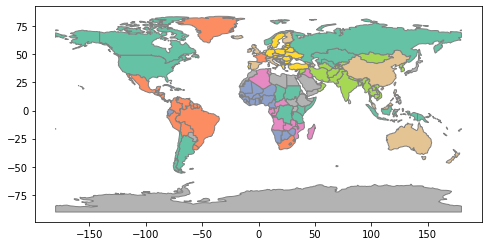

In [54]:
import matplotlib.pyplot as plt
import geopandas as gpd
from descartes import PolygonPatch
#loading GeoDataFrames 

fig, ax = plt.subplots(1, 1)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
print('printing properties with world geopandas ')
#plot those GeoDataFrames
print(world.head())


print('ploting cities ')
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
world.head() 
#plot world map 
world.plot()

'''
# Plot population estimates with an accurate legend
'''
#fig, ax = plt.subplots(1, 1)
world.plot(column='pop_est', ax=ax, legend=True)

country_names = world[['name', 'iso_a3']]
#we use underlying base map 
base = world.plot(color='white', edgecolor='black')

#we plot all cities on a basemap
cities.plot(ax=base, marker='o', color='red', markersize=5);
plt.show()

'''
Access 'flights' data
'''
print('reading data from xlsx files global mobility')
data_gl = pd.read_excel('Global_Transnational_Mobility_dataset_v1_0.xlsx')

print('accessing the data')
print(data_gl.head())

print('make column with flights per each country "source_iso3" in 2014')
#create dataframe from data_gl for data_gl_2014


is_2014 = data_gl['year']==2014
data_2014 = data_gl[is_2014]

#data_gl_2014 = data_gl.iloc[data_gl['year'] == '2014']
print('new dataframe for 2014 is created')
#loop through all elements in iso_a3 

#for index, row in data_2014.iterrows(): 
#    print (row["source_iso3"], row["estimated_trips"])


#Now we plot number of flights on the map using plotCountryPatch function
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

def plotCountryPatch( axes, country_name, fcolor ):
    # plot a country on the provided axes
    nami = world[world.name == country_name]
    namigm = nami.__geo_interface__['features']  # geopandas's geo_interface
    namig0 = {'type': namigm[0]['geometry']['type'], \
              'coordinates': namigm[0]['geometry']['coordinates']}
    axes.add_patch(PolygonPatch( namig0, fc=fcolor, ec="black", alpha=0.85, zorder=2 ))

# plot the whole world
ax2 = world.plot( figsize=(8,4), edgecolor=u'gray', cmap='Set2' )

# or plot Africa continent
#ax2 = world[world.continent == 'Europe'].plot(figsize=(8,8), edgecolor=u'gray', cmap='Pastel1')

# then plot some countries on with color encoded in estimated_trips
for index, row in data_2014.iterrows(): 
    print (row["source_iso3"], row["estimated_trips"])
    plotCountryPatch(ax2, row["source_iso3"], row["estimated_trips"])

#plotCountryPatch(ax2, 'Germany', 'red')
#plotCountryPatch(ax2, 'Poland', 'green')

    
'''
Another option is:
Insert additional column 'flights' to the gpd.world dataframe with the number of flights
'''
#idx = 7
#new_col = [7, 8, 9] #number of flights from this country from another dataframe
#world.insert(loc=idx, column='flights', value=new_col)

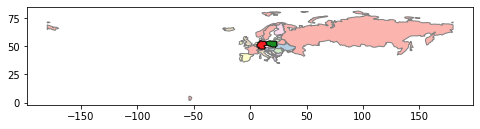

In [45]:
'''
Plot specific country in specific color
'''
import matplotlib.pyplot as plt
import geopandas as gpd
from descartes import PolygonPatch

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

def plotCountryPatch( axes, country_name, fcolor ):
    # plot a country on the provided axes
    nami = world[world.name == country_name]
    namigm = nami.__geo_interface__['features']  # geopandas's geo_interface
    namig0 = {'type': namigm[0]['geometry']['type'], \
              'coordinates': namigm[0]['geometry']['coordinates']}
    axes.add_patch(PolygonPatch( namig0, fc=fcolor, ec="black", alpha=0.85, zorder=2 ))

# plot the whole world
ax2 = world.plot( figsize=(8,4), edgecolor=u'gray', cmap='Set2' )

# or plot Africa continent
ax2 = world[world.continent == 'Europe'].plot(figsize=(8,8), edgecolor=u'gray', cmap='Pastel1')

# then plot some countries on top
plotCountryPatch(ax2, 'Germany', 'red')
plotCountryPatch(ax2, 'Poland', 'green')

# the place to plot additional vector data (points, lines)


